<a href="https://colab.research.google.com/github/clindeman28/stc510/blob/main/Module7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!pip install praw
!pip install psaw
from psaw import PushshiftAPI
import praw


     |████████████████████████████████| 176 kB 4.4 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 


In [2]:
uname = 'connorlindeman28'
upass = 'Adrian28!'
app_id = '5xxJZ_7qsWCC-wEi-v1DCw'
app_secret = 'uPEmDKJfIM1JY74ZBlqG8xbz-LRpNQ'

In [3]:
reddit = praw.Reddit(user_agent ="Starlight (by /u/connorlindeman28)",
                     client_id = app_id, client_secret=app_secret,
                     username=uname, password=upass)
api = PushshiftAPI(reddit)

So, I know this isn't really following the assignment, but my 'rq's weren't much of a research question, but rather a curiosity I have regarding Coca-Cola's newest soda, called Starlight. Coca-Cola Starlight is 'space flavored' according to Coke themselves, leaving room for lots of speculation as to what it actually tastes like. I've tried it, and have my own thoughts, but I wanted to scarpe reddit, find which words were being used to describe it, and then put in in a graph to see if I could narrow it down at all. 

In [59]:
coke_subs = []
search_args = {
    'q': 'Coca-Cola Starlight',
    'limit':2000

}
coke_subs += list(api.search_submissions(**search_args))

/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [5]:
len(coke_subs)

101

In [60]:
titles = [eachsub.title for eachsub in coke_subs]

In [61]:
body = [eachsub.selftext for eachsub in coke_subs]

In [62]:
comments = [x.body for x in coke_subs[4].comments]

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [63]:
mentions = {'Title' : titles,
            'Body':body,
            }


 

In [10]:
df = pd.DataFrame(mentions)

In [11]:
df

,Title,Body
0,Bought some Coca-Cola starlight. I'll tell you...,
1,Anyone seen the new Coca Cola starlight flavor...,Edit: found some. Tastes like Oreos and coke
2,FREE Coca-Cola Starlight at Safeway,
3,Has anyone seen Coca-Cola Starlight in stores ...,"Hi, my name is timewreckoner, and I'm an addic..."
4,Coca-Cola Starlight: All About the New Limited...,
...,...,...
96,Hi everyone! LARGE DESTASH! Prices LOWERED! Je...,Hello! I am mostly interested in selling but w...
97,[Sell/Swap] Hi everyone! LARGE DESTASH and pri...,Hello! I am mostly interested in selling but w...
98,[CRIT]A novel I accidentally started writing.....,[deleted]
99,Pages From the Temple of Greed: Grief,I found the antidote to addiction. \n\nAbstin...


In [12]:
!pip install nltk

In [13]:
from nltk import sent_tokenize, word_tokenize, pos_tag

In [14]:
from nltk.corpus import stopwords

In [33]:
import nltk

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [91]:
refined_body = re.findall(r'.{100}Starlight.{200}',' '.join(body))

In [88]:
refined_titles = re.findall(r'.{100}Starlight.{200}',' '.join(titles))

In [89]:
refined_titles = re.findall(r'.{100}Starlight.{200}',' '.join(titles))

In [90]:
refined_titles

['like in the comments. Anyone seen the new Coca Cola starlight flavor around Winston? FREE Coca-Cola Starlight at Safeway Has anyone seen Coca-Cola Starlight in stores here yet? Coca-Cola Starlight: All About the New Limited-Edition Soda Got my hands on the new starlight Coca Cola, small 300ml bottles were th',
 ' It might be the Zero Sugar, but still. I do get a Cotton Candy taste from it. Free 20 oz Coca-Cola Starlight @ Pavilions & Safeway! Google Translate and the News CLXXXIII Starlight? Not So Bright Just got my Limited Edition Coca-cola Starlight kit from Sampler! I thought I was just gonna get a free coke lol',
 ' free bottle of starlight not all this awesome Coca-cola swag too!! Came with a bottle of Coca-cola Starlight, a bucket hat, sunglasses, a t-shirt, gold metal straw, and a coca-cola sticker! Coca Cola made a delivery of Starlight Coke starlight changes flavor Coca-Cola Starlight: Space Cookies Coca-Cola Star',
 ' starlight review (space coca cola) Coca-Cola Starlight 

In [92]:
import json


In [93]:
result = json.dumps(refined_titles)

In [96]:
results = json.dumps(refined_body)

In [94]:
result

'["like in the comments. Anyone seen the new Coca Cola starlight flavor around Winston? FREE Coca-Cola Starlight at Safeway Has anyone seen Coca-Cola Starlight in stores here yet? Coca-Cola Starlight: All About the New Limited-Edition Soda Got my hands on the new starlight Coca Cola, small 300ml bottles were th", " It might be the Zero Sugar, but still. I do get a Cotton Candy taste from it. Free 20 oz Coca-Cola Starlight @ Pavilions & Safeway! Google Translate and the News CLXXXIII Starlight? Not So Bright Just got my Limited Edition Coca-cola Starlight kit from Sampler! I thought I was just gonna get a free coke lol", " free bottle of starlight not all this awesome Coca-cola swag too!! Came with a bottle of Coca-cola Starlight, a bucket hat, sunglasses, a t-shirt, gold metal straw, and a coca-cola sticker! Coca Cola made a delivery of Starlight Coke starlight changes flavor Coca-Cola Starlight: Space Cookies Coca-Cola Star", " starlight review (space coca cola) Coca-Cola Starlight Co

In [97]:
sent_titles = nltk.sent_tokenize(result)

In [98]:
sent_body = nltk.sent_tokenize(results)

In [99]:
sent_body

['["he amazing work of artists to star in Fiji.',
 'Pepsi is like coffee.',
 'My review of Coca-Cola Zero Sugar Starlight: [https://theduckpin.substack.com/p/starlight-not-so-bright](https://theduckpin.substack.com/p/starlight-not-so-bright)    Coca Cola starlight starts s\\u2019mores, becomes cherry coke + cream soda, then r", "also looking for the new Dragonfruit Fanta Zero.',
 'Coke recently launched a mysterious flavor called \\u201cStarlight\\u201d.',
 'They didn\\u2019t describe the taste except to say that it was supposed to be evocative of a night spent \\u201cunderneath the stars\\u201d.',
 'I just tasted it 5 minutes ago, and I can\\u2019t believe what a brilliant move ", "a-Cola Creations products coming down the line?',
 '[deleted]   Does anyone think the new coca-cola \\u201cStarlight\\u201d coming out has anything to do with Starfield releasing this year?',
 'Like a brand deal, with it going to be in the game?',
 'Or am I reaching?',
 'I found an article (https://www.goog

In [101]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [105]:
from collections import defaultdict

In [102]:
body_tagged = [pos_tag(word_tokenize(sent)) for sent in sent_body]

In [121]:
from nltk.corpus import stopwords

In [103]:
body_tagged

[[('[', 'NN'),
  ('``', '``'),
  ('he', 'PRP'),
  ('amazing', 'VBG'),
  ('work', 'NN'),
  ('of', 'IN'),
  ('artists', 'NNS'),
  ('to', 'TO'),
  ('star', 'VB'),
  ('in', 'IN'),
  ('Fiji', 'NNP'),
  ('.', '.')],
 [('Pepsi', 'NNS'),
  ('is', 'VBZ'),
  ('like', 'IN'),
  ('coffee', 'NN'),
  ('.', '.')],
 [('My', 'PRP$'),
  ('review', 'NN'),
  ('of', 'IN'),
  ('Coca-Cola', 'NNP'),
  ('Zero', 'NNP'),
  ('Sugar', 'NNP'),
  ('Starlight', 'NNP'),
  (':', ':'),
  ('[', 'JJ'),
  ('https', 'NN'),
  (':', ':'),
  ('//theduckpin.substack.com/p/starlight-not-so-bright', 'JJ'),
  (']', 'NN'),
  ('(', '('),
  ('https', 'JJ'),
  (':', ':'),
  ('//theduckpin.substack.com/p/starlight-not-so-bright', 'JJ'),
  (')', ')'),
  ('Coca', 'NNP'),
  ('Cola', 'NNP'),
  ('starlight', 'VBD'),
  ('starts', 'NNS'),
  ('s\\u2019mores', 'NNS'),
  (',', ','),
  ('becomes', 'VBZ'),
  ('cherry', 'JJ'),
  ('coke', 'NN'),
  ('+', 'NNP'),
  ('cream', 'NN'),
  ('soda', 'NN'),
  (',', ','),
  ('then', 'RB'),
  ('r', 'NN'),
  ("''

In [123]:
body_noun = defaultdict(int)
for sent in body_tagged:
  for word, pos in sent:
    if pos[:2] == 'NN': 
      body_noun[word.lower()] +=1

In [137]:
body_noun.popitem

<function defaultdict.popitem>

In [125]:
import matplotlib.pyplot as plt


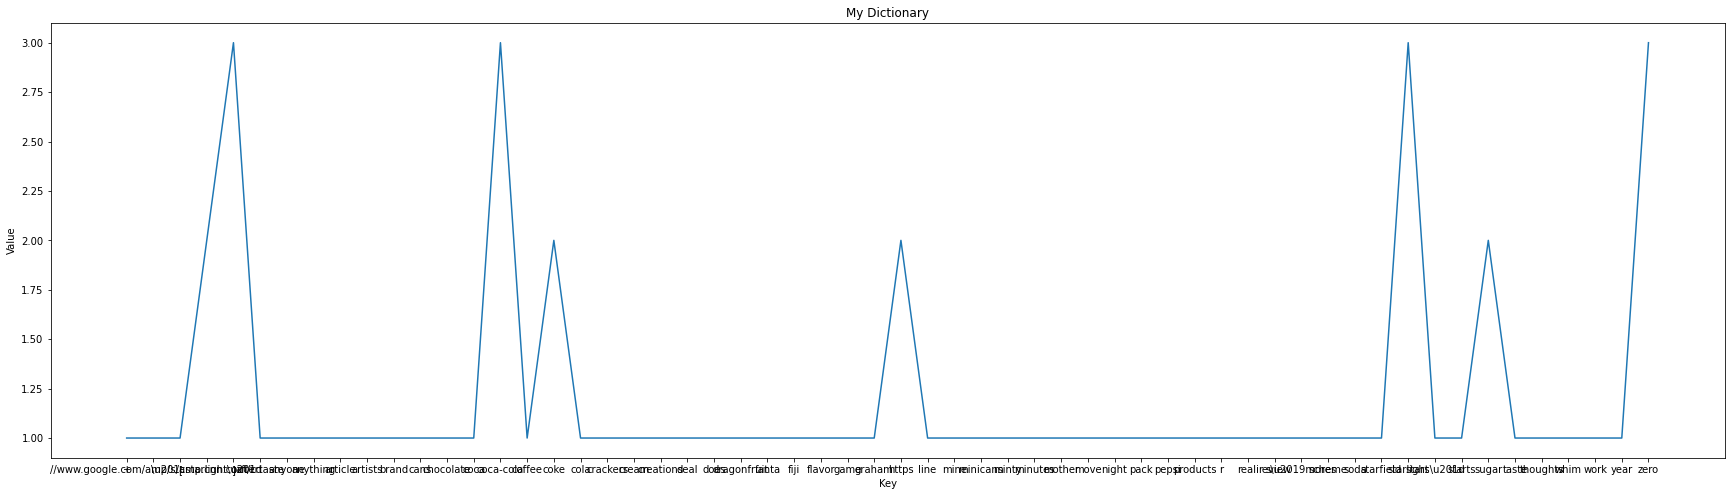

In [131]:
myList = body_noun.items()
myList = sorted(myList)
x, y = zip(*myList)
plt.rcParams["figure.figsize"] = (30,8)

plt.plot(x, y)
plt.xlabel('Key')
plt.ylabel('Value')
plt.title('My Dictionary')
plt.show()

In [141]:
myList.pop(0)

('+', 1)

In [144]:
myList.pop(0)


('//www.google.com/amp/s/amp.cnn.com/c', 1)

In [151]:
myList.pop(0)

('+', 1)

In [152]:
myList.pop(0)

('//www.google.com/amp/s/amp.cnn.com/c', 1)

In [153]:
myList.pop(0)

('[', 1)

In [155]:
myList.pop(0)

('\\u201cstarlight\\u201d', 2)

In [156]:
myList.pop(0)

(']', 3)

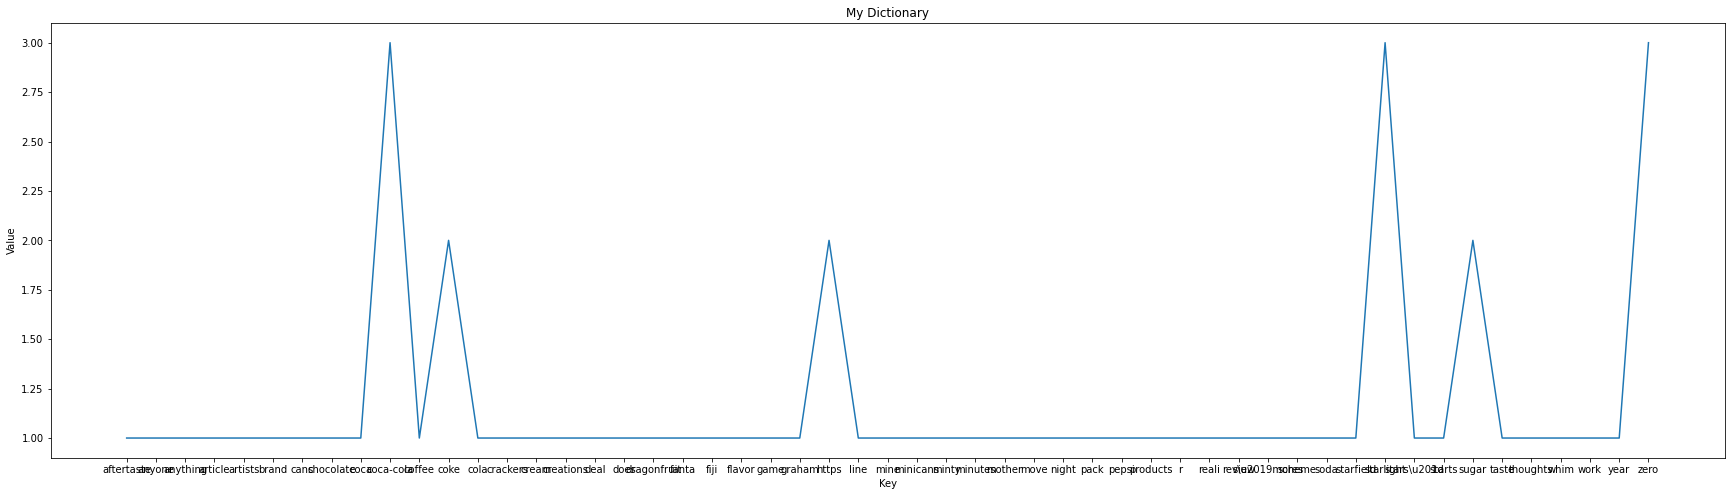

In [157]:

myList = sorted(myList)
x, y = zip(*myList)
plt.rcParams["figure.figsize"] = (30,8)

plt.plot(x, y)
plt.xlabel('Key')
plt.ylabel('Value')
plt.title('My Dictionary')
plt.show()

Based on this graph, my initial hunch that no one really knows the flavor of the new Coke Starlight is true. Plenty of words were used to describe it's flavor like coffee, smores, sugar, chocolate, etc, but none were used very often. 